In [ ]:
import pandas as pd
df = pd.read_csv('admission_dataset.csv')
df

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,315,105,3,2.0,2.5,8.48,0,0.75
1,321,112,5,5.0,5.0,9.06,1,0.86
2,327,103,3,4.0,4.0,8.30,1,0.74
3,305,112,3,3.0,3.5,8.65,0,0.71
4,297,96,2,2.5,1.5,7.89,0,0.43
...,...,...,...,...,...,...,...,...
395,320,111,4,4.5,3.5,8.87,1,0.85
396,305,103,2,2.5,3.5,8.13,0,0.59
397,305,107,2,2.5,2.5,8.42,0,0.71
398,320,104,3,3.0,2.5,8.57,1,0.74


In [ ]:
# Verificando se dados faltantes existem e os tipos de dados de cada coluna:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          400 non-null    int64  
 1   TOEFL Score        400 non-null    int64  
 2   University Rating  400 non-null    int64  
 3   SOP                400 non-null    float64
 4   LOR                400 non-null    float64
 5   CGPA               400 non-null    float64
 6   Research           400 non-null    int64  
 7   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 25.1 KB


In [ ]:
# Analisando a estatística descritiva das variáveis:
df.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [ ]:
# Separando coluna de saída das colunas de entradas:
X = df.drop('Chance of Admit', axis = 1)
y = df['Chance of Admit']
# to do: one hot encoding

# Separando dados de treino e dados de teste:
x_treino = X[0:300]
y_treino = y[0:300]
x_teste = X[300:]
y_teste = y[300:]

# to do: dividir dados de treino e teste de forma estratificada:


In [ ]:
# criação dos modelos
from sklearn import linear_model # LinearRegression
from sklearn import tree         # DecisionTreeRegressor
from sklearn import ensemble     # RandomForestRegressor

# to do: testar outros parâmetros:
modelo_rl = linear_model.LinearRegression(fit_intercept=True)
modelo_ad = tree.DecisionTreeRegressor(random_state=42) # max_depth=5
modelo_rf = ensemble.RandomForestRegressor(random_state=42) # max_depth=5

# treino dos modelos
modelo_rl.fit(x_treino, y_treino)
modelo_ad.fit(x_treino, y_treino)
modelo_rf.fit(x_treino, y_treino)

RandomForestRegressor(random_state=42)

In [ ]:
# previsões de treino e de teste:
previsao_rl_treino = modelo_rl.predict(x_treino)
previsao_ad_treino = modelo_ad.predict(x_treino)
previsao_rf_treino = modelo_rf.predict(x_treino)

previsao_rl_teste = modelo_rl.predict(x_teste)
previsao_ad_teste = modelo_ad.predict(x_teste)
previsao_rf_teste = modelo_rf.predict(x_teste)

In [ ]:
# cálculo de SEE (SEQ), MSE de treino e de teste:
# SEQ:
import numpy as np
seq_treino_rl = np.sum((y_treino - previsao_rl_treino) ** 2)
seq_treino_ad = np.sum((y_treino - previsao_ad_treino) ** 2)
seq_treino_rf = np.sum((y_treino - previsao_rf_treino) ** 2)

seq_teste_rl = np.sum((y_teste - previsao_rl_teste) ** 2)
seq_teste_ad = np.sum((y_teste - previsao_ad_teste) ** 2)
seq_teste_rf = np.sum((y_teste - previsao_rf_teste) ** 2)

# MSE:
from sklearn import metrics
mse_rl_treino = metrics.mean_squared_error(y_treino, previsao_rl_treino)
mse_ad_treino = metrics.mean_squared_error(y_treino, previsao_ad_treino)
mse_rf_treino = metrics.mean_squared_error(y_treino, previsao_rf_treino)

mse_rl_teste = metrics.mean_squared_error(y_teste, previsao_rl_teste)
mse_ad_teste = metrics.mean_squared_error(y_teste, previsao_ad_teste)
mse_rf_teste = metrics.mean_squared_error(y_teste, previsao_rf_teste)

In [ ]:
# tabela com os valores de SEE e MSE calculados anteriormente:

tab_metricas = {'Modelo': ['Regressão Linear', 'Árvore de Decisão',
                            'Random Forest', 'Regressão Linear',
                            'Árvore de Decisão', 'Random Forest'],
                'Conjunto de Dados': ['Treino', 'Treino', 'Treino',
                                      'Teste', 'Teste', 'Teste'],
                'SEQ': [seq_treino_rl, seq_treino_ad, seq_treino_rf,
                        seq_teste_rl, seq_teste_ad, seq_teste_rf],
                'MSE': [mse_rl_treino, mse_ad_treino, mse_rf_treino,
                        mse_rl_teste, mse_ad_teste, mse_rf_teste]}

df_metricas = pd.DataFrame(tab_metricas)
display(df_metricas)

,Modelo,Conjunto de Dados,SEQ,MSE
0,Regressão Linear,Treino,1.165933e+00,3.886444e-03
1,Árvore de Decisão,Treino,3.697785e-32,1.232595e-34
2,Random Forest,Treino,1.963630e-01,6.545433e-04
3,Regressão Linear,Teste,4.465931e-01,4.465931e-03
4,Árvore de Decisão,Teste,8.260000e-01,8.260000e-03
5,Random Forest,Teste,5.127481e-01,5.127481e-03


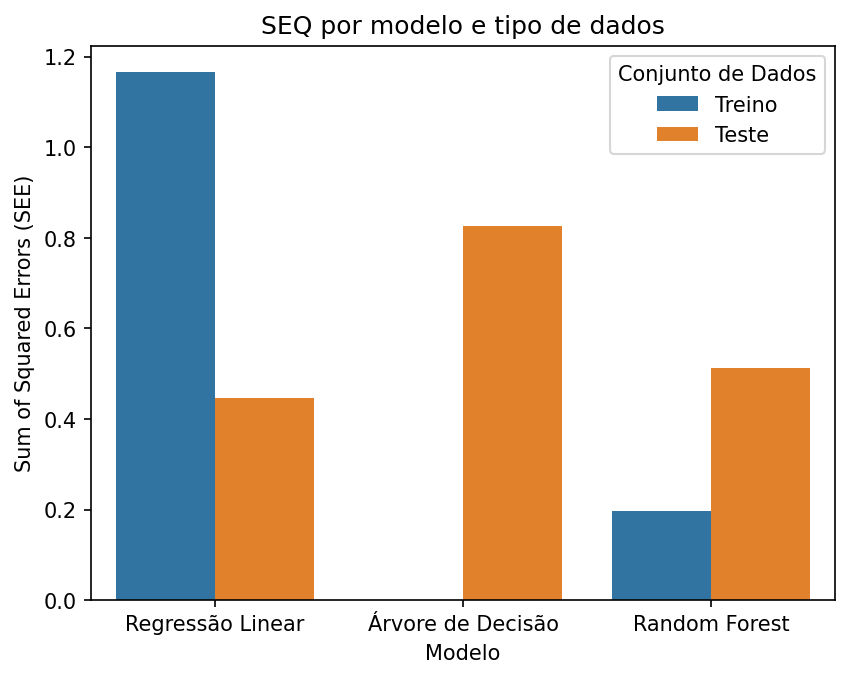

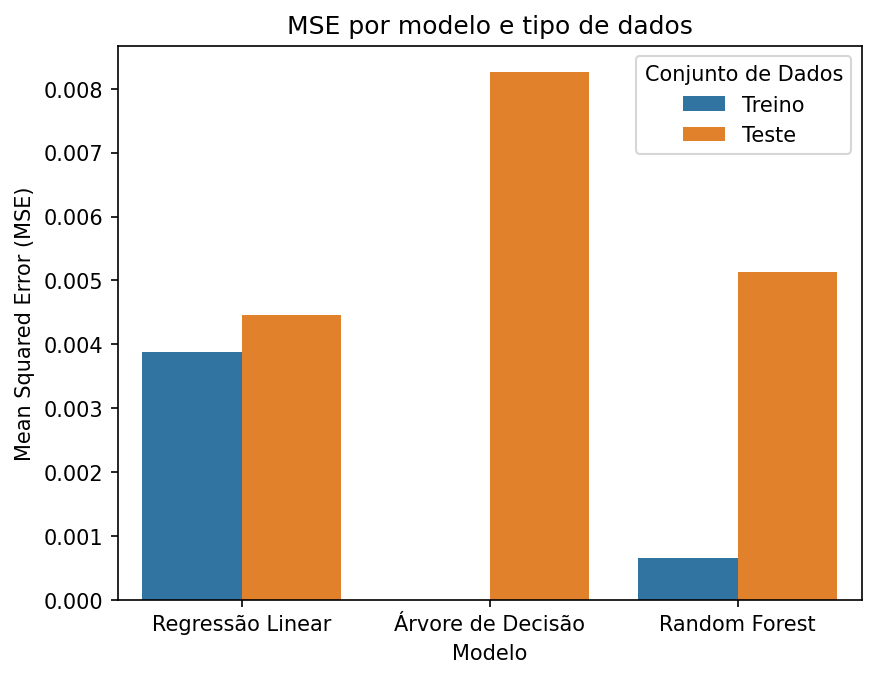

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting SEE
plt.figure(dpi=150)
sns.barplot(x='Modelo', y='SEQ', hue='Conjunto de Dados', data=df_metricas)
plt.title('SEQ por modelo e tipo de dados')
plt.ylabel('Sum of Squared Errors (SEE)')
plt.show()

# Plotting MSE
plt.figure(dpi=150)
sns.barplot(x='Modelo', y='MSE', hue='Conjunto de Dados', data=df_metricas)
plt.title('MSE por modelo e tipo de dados')
plt.ylabel('Mean Squared Error (MSE)')
plt.show()

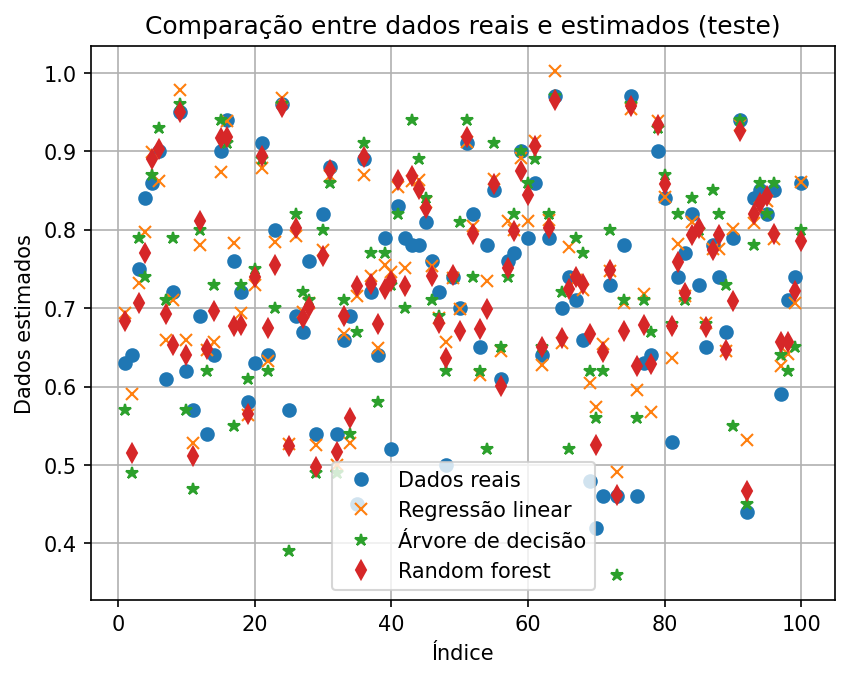

In [ ]:
# mostrar o gráfico comparativo entre real vs estimado
# (dados de teste):
import matplotlib.pyplot as pl
indices = list(range(1, len(y_teste)+1))
plt.figure(dpi=150)
plt.plot(indices, y_teste, 'o', label='Dados reais')
plt.plot(indices, previsao_rl_teste, 'x', label='Regressão linear')
plt.plot(indices, previsao_ad_teste, '*', label='Árvore de decisão')
plt.plot(indices, previsao_rf_teste, 'd', label='Random forest')
plt.grid(True)
plt.xlabel('Índice')
plt.ylabel('Dados estimados')
plt.title(f'Comparação entre dados reais e estimados (teste)')
plt.legend()
plt.show()

https://colab.research.google.com/drive/1eVeMjybA4Lax7kqzyBOs6JIWBrUVCxFz?usp=sharing

In [ ]:
y_teste

,Chance of Admit
300,0.63
301,0.64
302,0.75
303,0.84
304,0.86
...,...
395,0.85
396,0.59
397,0.71
398,0.74
